## Sentiment Analysis with Tweepy

### Set up environment

In [2]:
!pip install tweepy==4.9.0

In [3]:
!pip install textblob

In [4]:
!pip install wordcloud

In [7]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


### Twitter Authentication

In [8]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAOVMjwEAAAAAz3YAf8h62laWvirfBC9hKbH%2B5fs%3DZQkG4Pc7qN0uE157pmsoYWMb7b8JgacVEAqYEAFnpvK86uK5dF')

### Get recent public tweets on a keyword

In [9]:
# Pull tweets from twitter

query = '#apple -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,           
    query=query,                           
    max_results=100,                       
    limit=10                               
)
tweet_list = []

#flatten() - return a copy of the array collapsed into one dimensional.
for tweet in paginator.flatten(): 
    tweet_list.append(tweet)
    print(tweet)

@WatcherGuru Remember when #Apple refused to unlock / decrypt iPhones for the government? I guess they grabbed them balls somehow
#Coinbase Disables Mobile #NFT Trading, Citing #Apple’s App Store Policies.  https://t.co/BUUQKfkCrr
Well needed regulation from #Apple https://t.co/p7cbVwtvbf
30% seems a little greedy #Apple https://t.co/Qk6iVpIJDz
#Apple Blocks #Coinbase #Wallet Release on #iOS https://t.co/H6tsfmt9Mv via @WatcherGuru
Lol could this be bullish #Apple integrating #Ethereum et al or do they just not understand how blockchains work? 😂 https://t.co/XL4H2oZe9a
Did you know today is International Eat an Apple Day?🍎👇

Gifted from OBA Snacks, we tried their 100% Flour-Free Light &amp; Crunchy Apple Snacks. Perfect for a quick snack and to fuel your daily grind!🍏

Special thank you to OBA for the delicious treat!🍎

#Apple #NationalAppleDay https://t.co/Z8A0g6Miin
Dec 2, 1996. 
#SteveJobs returns to #Apple: in late 1996, Apple announced plans to bring Jobs back, by acquiring his st

#Apple has done a great job making all their products work together, but what happens when you want to leave the ecosystem? Let’s look at how you can still use Apple applications and services when replacing #macos with #Linux:

https://t.co/HISfZ1u50X https://t.co/uwcan2BTRQ
Safari is crappy

😖😤
#Apple #macOS #iOS #iPadOS
"@Coinbase says @Apple blocked its last app release on #NFTs in wallet."

https://t.co/YlKhpL5ffx

Tim Cook is looking to start a war with the #Web3, #Crypto, and #NFT communities! 😂

#News, #CryptoNews, #CryptoMarket, #Apple. #Coinbase https://t.co/GINPT0iPqA
Proud of this! #kol fan since day 1 #apple #applereplay #kol #kingsofleon @KingsOfLeon https://t.co/A72RgqWxEe
14" M1 Pro #MacBook Pro with 10-Core CPU available for $2139 at #Apple, Certified Refurbished, save $360: https://t.co/hDbmdL8yQY
Don’t nickel and dime your employees. #gainwithstewartilondanga #AR #AI #MR #XR #merrychristmas #Web3 #SaaS #AIoT #MLOps #Space #DevOps #fintech #Metaverse #VirtualReality #S

Spotify CEO Daniel Ek posts lengthy tweet&amp;storm complaining about Apple: It’s not just Elon Musk using Twitter to complain about Apple (even if Tim Cook is now his new bestie): Spotify CEO Daniel Ek has tweeted a lengthy thread about… https://t.co/D6oHd94DiD #mac #apple #news
So #Apple basically runs sweatshops, censors US citizens, supports suppression in China, disables #NFT for the young crowd and goes to war with #ELONMUSK 

Merry Xmas 🎅 @tim_cook https://t.co/70VgtstKjO
SigmaOS 1.1.0 &amp; Web browser made for work.: SigmaOS - the browser that makes you faster and better at working on the web. Main advantages: Workspaces - Organize your pages and web-apps by project. Split Screen - Multitask like a pro… https://t.co/fSbNDSDeBF #mac #apple #news
WTF next, a sombrero for your console lol. "Microsoft Is Selling a $25 Hoodie for Your Xbox Controller"  https://t.co/wdOcohDwoZ #apple+ tech #feedly
Angry Birds, Alto's Odyssey et Doodle God arrivent sur #Apple (@Apple) Arcade https://

@nmlinguaphile @ClayTravis @Apple That’s the reason why #apple deleted the function airdrop in China which protestors use to fight for freedom
How old phones became the cool, good phones in 2022  (via @NewsfusionApps #Apple News) https://t.co/yjNVX8C0IX
Performance results of Apple's highly anticipated M2 Max processor leaked 
#Hardware #Apple #Computers #Motherboard_Processor_RAM_Max #Notebook
https://t.co/fQ7ZlE7pTf
Apple Byte 2020 #NFT #NFTProject my mission: #saveourchildrenfrompedophiles 
Save our children from feminists 🫃🏻🚩🖤🕳#BalenciagaGroomers #Vogue 
#artist #Balenciaga #USA #Apple #applegate #ADN #Agenda2030 #ai #feminisme #feminist cult  #wokegate 

#God #divinefeminine #risingup https://t.co/WcgCByJgYj
“What if you don’t invest in your people and they stay?” #gainwithstewartilondanga #AR #AI #MR #XR #merrychristmas #Web3 #SaaS #AIoT #MLOps #Space #DevOps #fintech #Metaverse #VirtualReality #SlackFrontiers #CyberSecurity #MachineLearning #PodcastAndChill #PS5 #Apple #HBOMax
D

An effective method to get battery percentage and other icons on your iPhone! 
The iPhone battery icon gives a valuabl... #apple #apple_iPad #apple_iphone #apple_tv #apple_watch #But_what_about_Battery_Percentage_on_the_main_screens #How_do_you_get_Battery_Perc... https://t.co/N2xcLqWi9c
🍎 Old School! #apple #ThrowbackThursday #retrocomputing https://t.co/UeQhmYDeRS
Content analysis:
This article scores 82/100. The complete report can be viewed here: https://t.co/sVMs0Rcryf
(I'm a bot)

#Apple #ItsWithin https://t.co/y7UtrQ3M7E
Bee Swarm Simulator Codes | Bee Swarm Simulator Mythic Egg Codes https://t.co/l6ISwbbtBW #applewatch #iphone #samsung #ios #pro #plus #apple
#twitter #tesla #spacex #elonmusk #apple #photo #art #humor

I was reading the comments of people telling Musk what he should do.  ☺️
It gave me the idea for this composite photo. https://t.co/DZzRAEqo9f
Ball Blue #8941718
Price : 1 $ETH
Marketplace to buy⤵️ https://t.co/uJM0wEt8Le

#Doge #AxieInfinity #PnE #Ronin #NFT #Wor

How To Type A Caret ^ Symbol On Mac #caret #mac #macos #apple https://t.co/2zrPNyzqsS
Dear @Apple,
Do you remember the last seconds of the first apple commercial? I will remind you.

https://t.co/uqr09cFRbh

Today I read that #Apple blocked AirDrop in China which was used by protestors. I see that 2022 is like "1984" today.

https://t.co/Lc6qLPYuoi

#apple1984
@CryptoKaleo The selfsame #Apple seems to favor this kind of behaviour of the society. Than what?
❤️💖🔥 👉👉 LINK : https://t.co/enH3EtiAfc 🔗🔗 ❤️
#fifa22 
#minecraft #fortnite #robolox #callofduty #leagueoflegends
#tiktok #instagram #facebook #snapchat #telegram #spotify #zoom #google #apple #iphone #trending
An Apple ‘smart ring’ could follow with AR/VR headset https://t.co/A1cUJPFRqX via @GeekTech_App #geektech #technewsapp #iMore  #Apple
❤️💖🔥 👉👉 LINK : https://t.co/nBGB9jzdiJ 🔗🔗 ❤️
#fifa22 
#minecraft #fortnite #robolox #callofduty #leagueoflegends
#tiktok #instagram #facebook #snapchat #telegram #spotify #zoom #google #apple #ip

So you reacted poorly BEFORE fully understanding what was happening… again. #elon #apple #twitter #elonmusk https://t.co/2Nr0bnvIM0
Woke mega companies like #Apple and #Nike act like this hasn't been happening in China for years. They pretend they simply had no idea. https://t.co/RqJutwsSf0
@elonmusk @tim_cook When billionaires get together they forget their Petty “problems of the Masses”, instead they wipe evidence to the side for one another and then cover their trails #elite #pukes #apple #EpsteinClientList @elonmusk #itsafix
@Treasury_AU issued  News Media and Digital Platforms Mandatory Bargaining Code - The Code's first year of operation #Google #Apple #Facebook #media #revenue #contentcreators #contentcreation 
https://t.co/v9dkinRzfR https://t.co/nLLFmjRz1R
A 15 times cheaper clone of the iPhone 13 Pro is now available in India https://t.co/K7WjmKYDQt
Close enough?
#Apple #iPhone #iPhone13Pro #Clone #IKall https://t.co/nWsH1WK4ou
iTunes 1500 Yen Gift Card | iTunes Japan Account

@elonmusk After how many Tweets &amp; Conspiracy theories about #Apple ?!🚩🆘 How about next time you talk to the person first before creating the issue?! @tim_cook @cnnbrk @BBCBreaking @NBCNews @MSNBC @VICENews @CNBCtech @MollyJongFast @CNBCFastMoney @andersoncooper @donlemon @donie
So good! #APPLE https://t.co/m0KmJXc8vh
Shameful #Apple https://t.co/YIw5MQMSaJ
@elonmusk @tim_cook After Inventing a conspiracy theory against #Apple @tim_cook 🚩🆘
Which is best for student? 
@apple #apple
#ElonMusk meets with #TimCook and claims that their disagreement has been "settled.
.
#globallancers #apple #twitter https://t.co/A7cwWPeOIW
@InsiderNikola #Bill Gates is wrong again 

More evidence that he cannot innovate and literally stole his software look and feel from #Apple 

Now Apple is using #Chinese slave labor to manufacture iPhones and colluding with the CCP by spying on the Chinese, Americans and Europeans citizens
Thursday’s ORTEX Data Highlights

ORTEX daily update about recent market devel

You have to order one of these before it's too late! @kickbooster #kickbooster  https://t.co/n4aJ7YjgW9 #Prince William
#Cocaine Bear
#Apple Music
#Lady Susan Hussey
#Ngozi Fulani
#Buckingham Palace
#Songbird
#Szczesny
#Tunisia
#danny ward
#Typhoo
#Danny Murphy
#Denmark
Ventura’s new Font Book is a real piece of sh** !!!
#Apple #mac #fontbook
Riiiight!😏 An instant invite to HQ, huh? 😏

Hope @elonmusk understands they're going to fight a proxy war using the #EU. Apple's panic could be a sign that #Apple is more vulnerable than we thought.  #AAPL #Europe #ELONMUSK #Elon https://t.co/7NPRF1s9fZ
UkrARMY cats &amp; dogs    @UAarmy_animals 
Games in the trenches. 
#Ukraine️ #RussiaisATerroistState #RussiaUkraineWar #CatsOfTwitter #CatsOnTwitter #Bakhmut #armedForces #Nikopol #NewYork #Zaporizhzia #Kyiv #StandWithUkraine #Apple #Bitcoin https://t.co/IBEko9flrF
@Apple 👎👎 @SamsungMobile 👍👍 China ISN'T about Free Speech or Freedom... and #Apple is helping #XiJinping. Libs &amp; Dems are OK with 

What's your favorite kind of apple? #thursdayvibes #Apple https://t.co/SrKhJs9wS3
Content analysis:
This article scores 80/100. The complete report can be viewed here: https://t.co/RdviXoEsQd
(I'm a bot)

#Apple https://t.co/a9GQWgx5fT
Apple releases iOS 16.1.2 update, offers Crash Detection, wireless carrier compatibility fixes

https://t.co/7ZuPHFwsy8

#Apple #iOS #iOS1612 #bug #fix #update #software #developer #iPhone14 #CrashDetection #wirelesscarrier #compatibility #broadband
TSMC to announce that their 2024 Arizona Plant will first produce 4nm chips in Phase I at the request of customers like Apple, AMD &amp; Nvidia: TSMC is breaking ground at an event in Arizona next week where they're expected to announce… https://t.co/l3huvTjWr6 #mac #apple #news
Apple Highlights Partnership With (RED) For World AIDS Day: For World AIDS Day today, Apple highlighted its long-standing partnership with (RED), which has raised more than a quarter of a billion dollars since 2006, and is offering… h

In [10]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,@WatcherGuru Remember when #Apple refused to u...
1,"#Coinbase Disables Mobile #NFT Trading, Citing..."
2,Well needed regulation from #Apple https://t.c...
3,30% seems a little greedy #Apple https://t.co/...
4,#Apple Blocks #Coinbase #Wallet Release on #iO...


In [11]:
tweet_list_df.tail()

,text
995,#Gutfeld The only reason I bought an iPhone wa...
996,"#twitter has altered anti-#apple pov, after tr..."
997,Inspirational! #apple #accessibility https://t...
998,#ELONMUSK teases #TeslaPiPhone after #Apple th...
999,Best Tether Betting Site For World Cup 2022\n ...


In [12]:
tweet_list_df.shape

(1000, 1)

In [13]:
tweet_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [14]:
tweet_list_df.dtypes

text    object
dtype: object

In [15]:
np.sum(tweet_list_df.isnull().any(axis=1))

0

### Data preprocessing

In [16]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [17]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [18]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,@WatcherGuru Remember when #Apple refused to u...,remember when apple refused to unlock decrypt...
1,"#Coinbase Disables Mobile #NFT Trading, Citing...",coinbase disables mobile nft trading citing a...
2,Well needed regulation from #Apple https://t.c...,well needed regulation from apple
3,30% seems a little greedy #Apple https://t.co/...,30 seems little greedy apple
4,#Apple Blocks #Coinbase #Wallet Release on #iO...,apple blocks coinbase wallet release on ios via


In [19]:
tweet_list_df.tail(6)

,text,cleaned
994,@tomselliott @Apple @tim_cook Doubt the #Uyghu...,cook doubt the uyghurs or those in the chinap...
995,#Gutfeld The only reason I bought an iPhone wa...,gutfeld the only reason bought an iphone was ...
996,"#twitter has altered anti-#apple pov, after tr...",twitter has altered anti apple pov after trip...
997,Inspirational! #apple #accessibility https://t...,inspirational apple accessibility
998,#ELONMUSK teases #TeslaPiPhone after #Apple th...,elonmusk teases teslapiphone after apple thre...
999,Best Tether Betting Site For World Cup 2022\n ...,best tether betting site for world cup 2022 te...


#### Removing Stopwords

In [20]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [21]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweet_list_df['cleaned'] = tweet_list_df['cleaned'].apply(lambda text: cleaning_stopwords(text))
tweet_list_df['cleaned'].head()

0    remember apple refused unlock decrypt iphones ...
1    coinbase disables mobile nft trading citing ap...
2                         well needed regulation apple
3                         30 seems little greedy apple
4         apple blocks coinbase wallet release ios via
Name: cleaned, dtype: object

#### Applying Stemming

In [22]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
tweet_list_df['cleaned']= tweet_list_df['cleaned'].apply(lambda x: stemming_on_text(x))
tweet_list_df['cleaned'].head()

0    remember apple refused unlock decrypt iphones ...
1    coinbase disables mobile nft trading citing ap...
2                         well needed regulation apple
3                         30 seems little greedy apple
4         apple blocks coinbase wallet release ios via
Name: cleaned, dtype: object

### Generate Sentiment Labels

In [23]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

print(tweet_list_df.head(5))
tweet_list_df.tail()

                                                text  \
0  @WatcherGuru Remember when #Apple refused to u...   
1  #Coinbase Disables Mobile #NFT Trading, Citing...   
2  Well needed regulation from #Apple https://t.c...   
3  30% seems a little greedy #Apple https://t.co/...   
4  #Apple Blocks #Coinbase #Wallet Release on #iO...   

                                             cleaned  polarity  subjectivity  \
0  remember apple refused unlock decrypt iphones ...    0.0000           0.0   
1  coinbase disables mobile nft trading citing ap...    0.0000           0.0   
2                       well needed regulation apple    0.0000           0.0   
3                       30 seems little greedy apple   -0.1875           0.5   
4       apple blocks coinbase wallet release ios via    0.0000           0.0   

  sentiment    neg    neu    pos  compound  
0  negative  0.180  0.820  0.000   -0.2960  
1   neutral  0.000  1.000  0.000    0.0000  
2  positive  0.000  0.588  0.412    0.2732  
3 

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
995,#Gutfeld The only reason I bought an iPhone wa...,gutfeld reason bought iphone twitter but phone...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
996,"#twitter has altered anti-#apple pov, after tr...",twitter altered anti apple pov trip magic moun...,0.5,1.0,negative,0.247,0.753,0.000,-0.3182
997,Inspirational! #apple #accessibility https://t...,inspirational apple accessibility,0.5,1.0,positive,0.000,0.377,0.623,0.5106
998,#ELONMUSK teases #TeslaPiPhone after #Apple th...,elonmusk teases teslapiphone apple threatened ...,0.0,0.0,negative,0.252,0.607,0.141,-0.5423
999,Best Tether Betting Site For World Cup 2022\n ...,best tether betting site world cup 2022 tether...,1.0,0.3,positive,0.000,0.724,0.276,0.6369


### Sentiment Visualisation

In [24]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

#### Donut Charts

In [25]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [26]:
#Count_values for sentiment
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
positive,443,44.3
neutral,296,29.6
negative,261,26.1


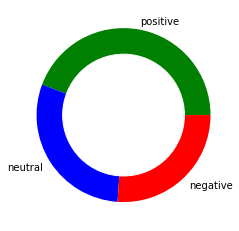

In [27]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")

names= pichart.index
size=pichart["Percentage"]

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Distribution of data

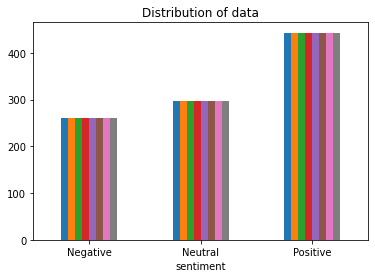

In [28]:
ax = tweet_list_df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(tweet_list_df['text']), list(tweet_list_df['sentiment'])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

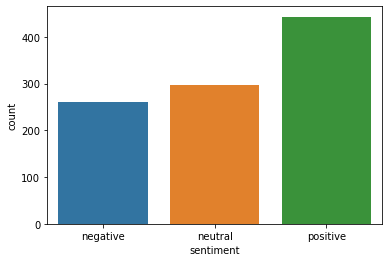

In [29]:
import seaborn as sns
sns.countplot(x='sentiment', data=tweet_list_df)

#### Word Clouds

In [30]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("c1_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="c1_wordcloud.png"
    display(Image.open(path))

Word Cloud Saved Successfully


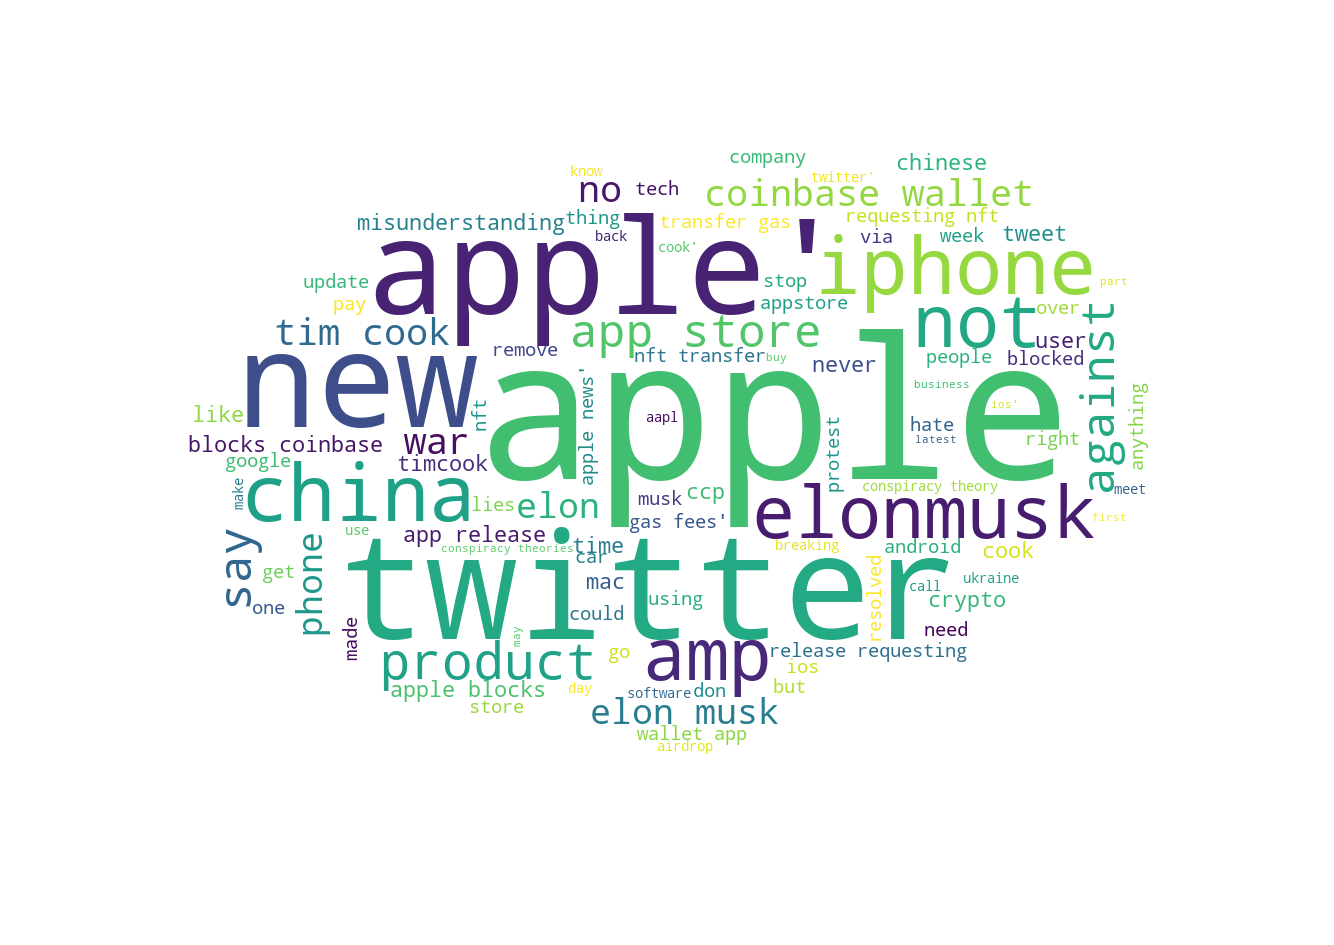

In [31]:
# Creating wordcloud for all tweets

create_wordcloud(tweet_list_df_negative["cleaned"].values)

Word Cloud Saved Successfully


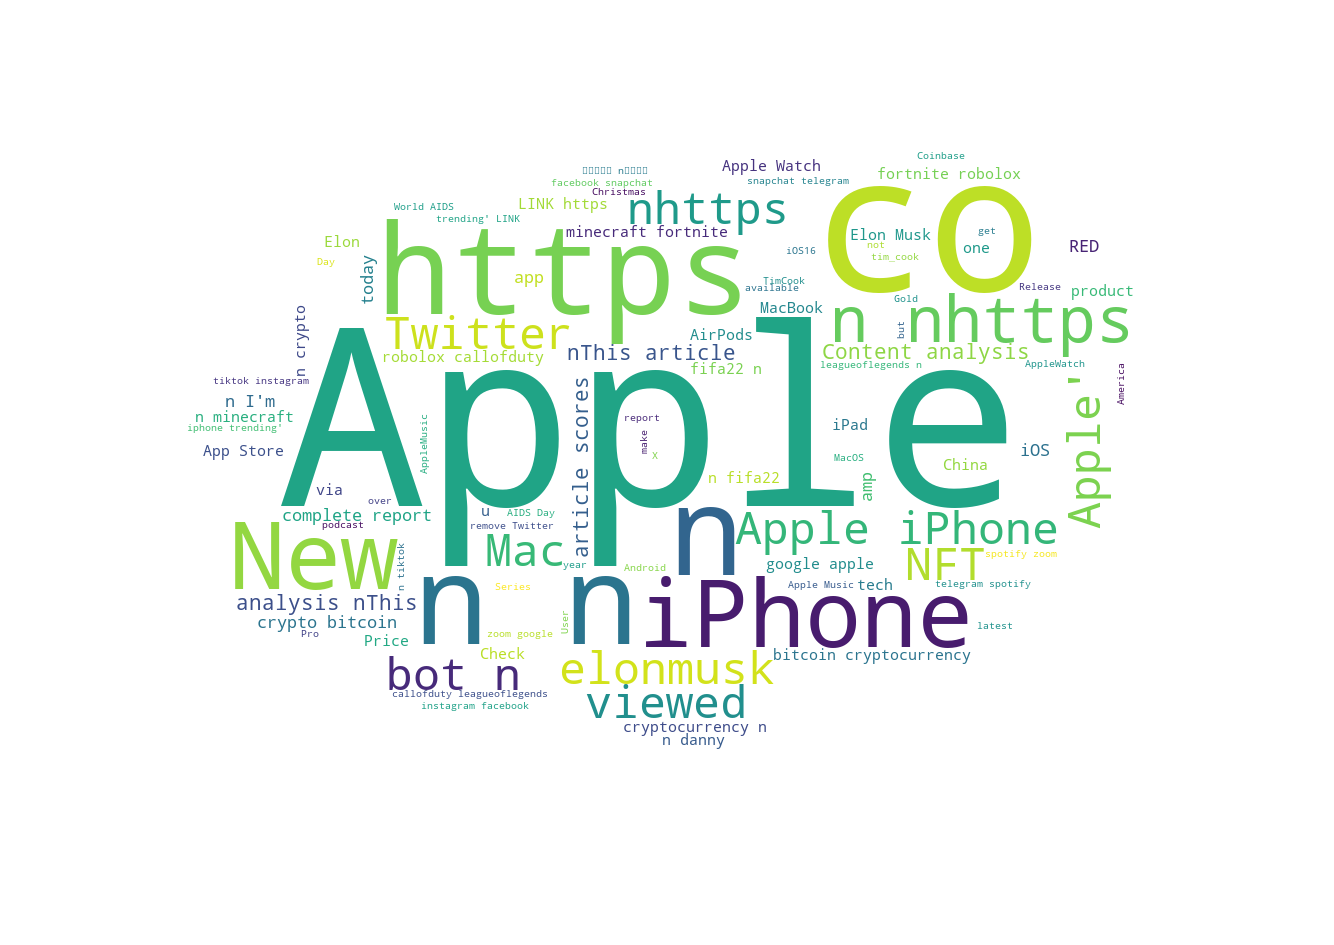

In [32]:
create_wordcloud(tweet_list_df_neutral["text"].values)

Word Cloud Saved Successfully


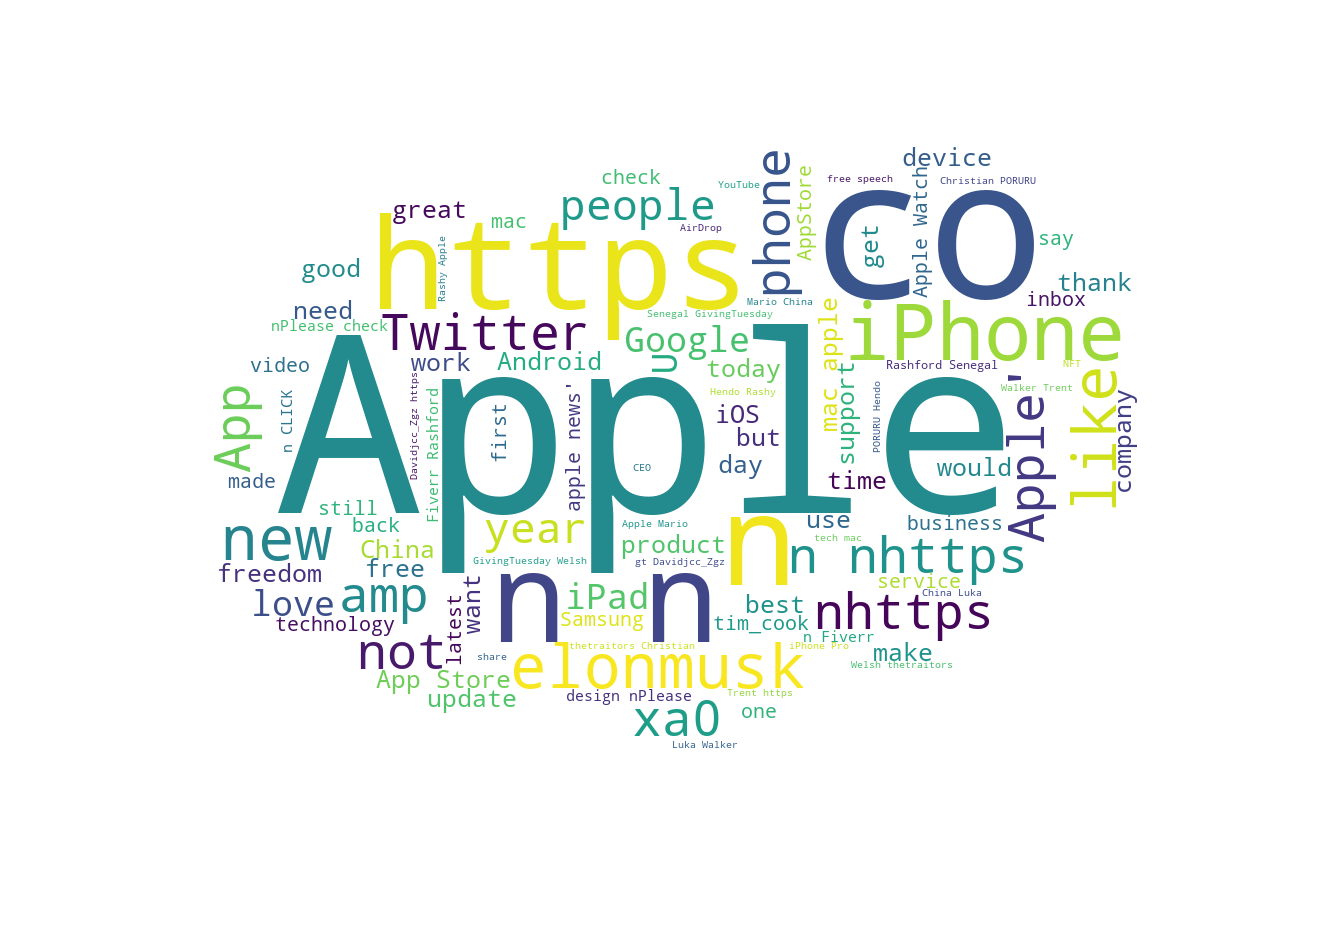

In [33]:
create_wordcloud(tweet_list_df_positive["text"].values)

Word Cloud Saved Successfully


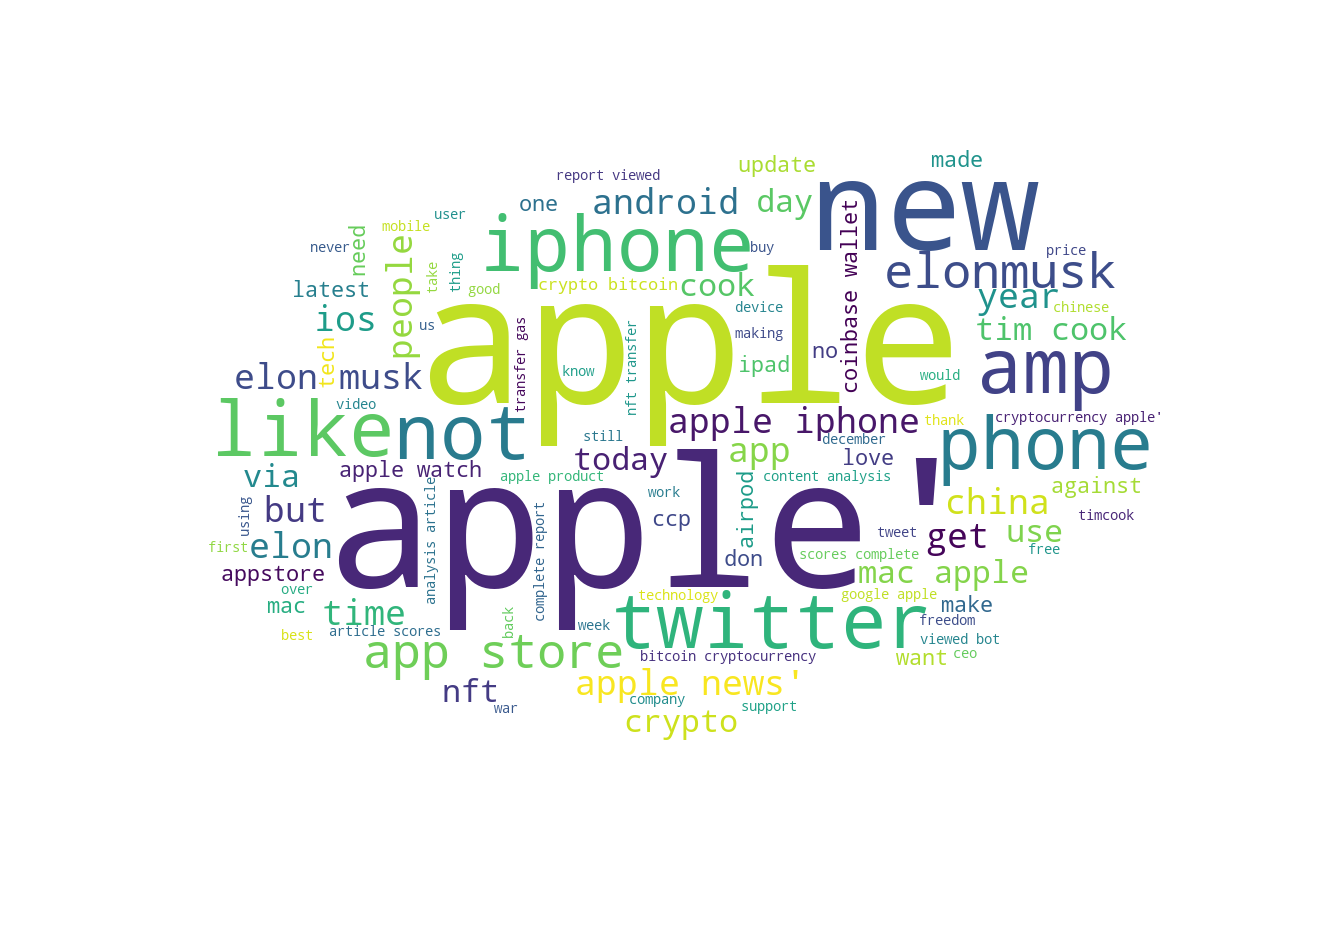

In [34]:
create_wordcloud(tweet_list_df["cleaned"].values)

#### Model

In [35]:
X=tweet_list_df.cleaned
y=tweet_list_df.sentiment

In [36]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  15999


C:\Users\muska\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

#### Model evaluation

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

C:\Users\muska\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muska\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muska\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        11
     neutral       0.83      0.31      0.45        16
    positive       0.50      0.96      0.66        23

    accuracy                           0.54        50
   macro avg       0.44      0.42      0.37        50
weighted avg       0.50      0.54      0.45        50



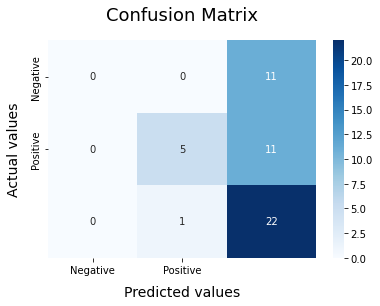

In [53]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)


#### Text Insights

In [42]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [43]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,113.53
neutral,102.58
positive,128.76


In [44]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,16.59
neutral,14.30
positive,18.30


### Saving Output Tweets File 

In [45]:
tweet_list_df.to_csv("c2_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,@WatcherGuru Remember when #Apple refused to u...,remember apple refused unlock decrypt iphones ...,0.0000,0.0,negative,0.180,0.820,0.000,-0.2960,84,11
1,"#Coinbase Disables Mobile #NFT Trading, Citing...",coinbase disables mobile nft trading citing ap...,0.0000,0.0,neutral,0.000,1.000,0.000,0.0000,68,10
2,Well needed regulation from #Apple https://t.c...,well needed regulation apple,0.0000,0.0,positive,0.000,0.588,0.412,0.2732,28,4
3,30% seems a little greedy #Apple https://t.co/...,30 seems little greedy apple,-0.1875,0.5,negative,0.334,0.666,0.000,-0.2516,28,5
4,#Apple Blocks #Coinbase #Wallet Release on #iO...,apple blocks coinbase wallet release ios via,0.0000,0.0,negative,0.241,0.759,0.000,-0.2263,44,7
